In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from orb import orb
from orb import get_max_orb_distance
from orb import evolve_orbs



In [146]:

A_initial_pos = 100*np.random.rand(2)#np.array([])
B_initial_pos = 100*np.random.rand(2)#np.array([])
C_initial_pos = 100*np.random.rand(2)#np.array([])
D_initial_pos = 100*np.random.rand(2)#np.array([])

A = orb(A_initial_pos)

B = orb(B_initial_pos)

C = orb(C_initial_pos)

D = orb(D_initial_pos)

orbs = np.array([A, B, C, D])

centroid = np.average(np.array([orb.position for orb in orbs]), axis=0)

avg_dist_to_centroid = np.average(np.array([np.linalg.norm(centroid - orb.position) for orb in orbs]))


A.set_target(B)
B.set_target(C)
C.set_target(D)
D.set_target(A)

In [147]:
t = 0
dt = 0.1
stop_distance = 0.3
time_array = np.array([0])
max_dists = np.array([get_max_orb_distance(orbs)])

while max_dists[-1] >= 0.3:

        A.update_velocity()
        B.update_velocity()
        C.update_velocity()
        D.update_velocity()

        A.update_position(dt)
        B.update_position(dt)
        C.update_position(dt)
        D.update_position(dt)

        t += dt
        time_array = np.append(time_array, t)

        max_dists = np.append(max_dists, get_max_orb_distance(orbs))



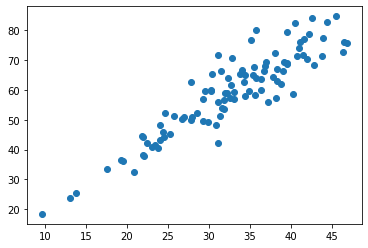

In [151]:
max_times = np.array([])
starting_mean_dists = np.array([])


for i in range(0,100):
    
    A_initial_pos = 100*np.random.rand(2)#np.array([])
    B_initial_pos = 100*np.random.rand(2)#np.array([])
    C_initial_pos = 100*np.random.rand(2)#np.array([])
    D_initial_pos = 100*np.random.rand(2)#np.array([])

    A = orb(A_initial_pos)

    B = orb(B_initial_pos)

    C = orb(C_initial_pos)

    D = orb(D_initial_pos)

    orbs = np.array([A, B, C, D])

    centroid = np.average(np.array([orb.position for orb in orbs]), axis=0)

    avg_dist_to_centroid = np.average(np.array([np.linalg.norm(centroid - orb.position) for orb in orbs]))

    starting_mean_dists = np.append(starting_mean_dists, avg_dist_to_centroid)

    A.set_target(B)
    B.set_target(C)
    C.set_target(D)
    D.set_target(A)

    t = 0
    dt = 0.1
    stop_distance = 0.3
    time_array = np.array([0])
    max_dists = np.array([get_max_orb_distance(orbs)])

    while max_dists[-1] >= 0.3:

        A.update_velocity()
        B.update_velocity()
        C.update_velocity()
        D.update_velocity()

        A.update_position(dt)
        B.update_position(dt)
        C.update_position(dt)
        D.update_position(dt)

        t += dt
        time_array = np.append(time_array, t)

        max_dists = np.append(max_dists, get_max_orb_distance(orbs))
    
    max_times = np.append(max_times, time_array[-1])

    
    


plt.scatter(starting_mean_dists, max_times)

In [152]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

popt, pcov = curve_fit(f, starting_mean_dists, max_times) # your data x, y to fit

residuals = max_times- f(starting_mean_dists, *popt)

ss_res = np.sum(residuals**2)

ss_tot = np.sum((max_times - np.mean(max_times))**2)

r_squared = 1 - (ss_res / ss_tot)

print('R^2 value: {}, slope = {}, y-intercept = {}.'.format(r_squared, popt[0], popt[1]))


R^2 value: 0.8356461500292924, slope = 1.635173548652792, y-intercept = 5.774135495335877.


[56.09561644]


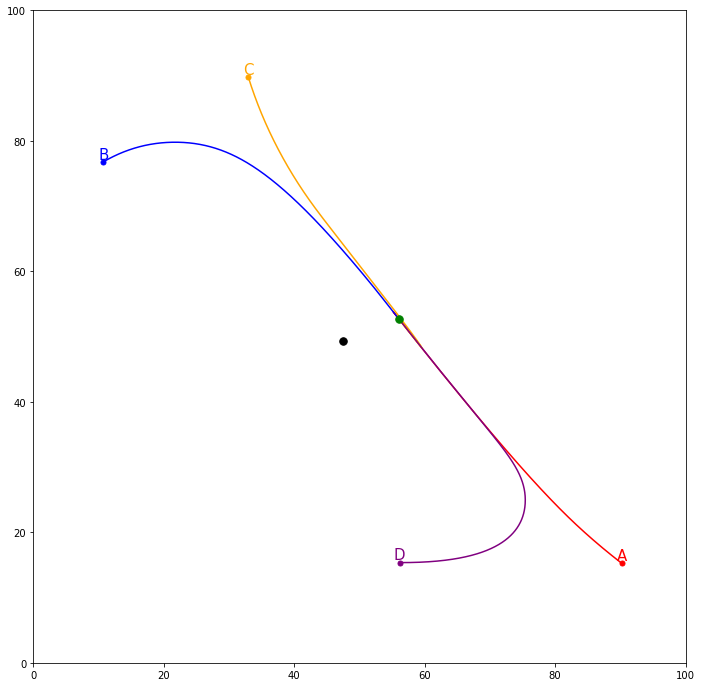

In [150]:
fig = plt.figure(figsize=(12,12))

plt.plot(A.x_positions, A.y_positions, color='red')
plt.plot(A.x_positions[0], A.y_positions[0], color='red', marker=".", markersize=10)
plt.text(A.x_positions[0], A.y_positions[0], 'A', fontsize = 15, color='red',ha='center', va = 'bottom')
plt.plot(B.x_positions, B.y_positions, color='blue')
plt.plot(B.x_positions[0], B.y_positions[0], color='blue', marker=".", markersize=10)
plt.text(B.x_positions[0], B.y_positions[0], 'B', fontsize = 15, color='blue',ha='center', va = 'bottom')
plt.plot(C.x_positions, C.y_positions, color='orange')
plt.plot(C.x_positions[0], C.y_positions[0], color='orange', marker=".", markersize=10)
plt.text(C.x_positions[0], C.y_positions[0], 'C', fontsize = 15, color='orange',ha='center', va = 'bottom')
plt.plot(D.x_positions, D.y_positions, color='purple')
plt.plot(D.x_positions[0], D.y_positions[0], color='purple', marker=".", markersize=10)
plt.text(D.x_positions[0], D.y_positions[0], 'D', fontsize = 15, color='purple',ha='center', va = 'bottom')
plt.gca().set_aspect("equal")
plt.xlim([0, 100])
plt.ylim([0, 100])



plt.plot(A.position[0], A.position[1], color='green', marker=".", markersize=15)
plt.plot(centroid[0], centroid[1], color='black', marker=".", markersize=15)
plt.show

a = np.array([])

a = np.append(a, A.position[0])

print(a)\

plt.savefig('path.png')